# Predicting Used Car Values

Our goal is to predict the price of a used car based on its different attributes (manufacturer, cylinders, condition, etc.). We would like to discover which attribute is the biggest contributing factor to price as well as which other attributes are valuable in increasing the price. We will also look into location to see which states have the biggest used car market and/or highest selling prices.

**Datasource:** Used Cars Dataset https://www.kaggle.com/austinreese/craigslist-carstrucks-data?select=vehicles.csv

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Mounted at /gdrive
/gdrive


In [ ]:
cd Shared\ drives/Team8A

/gdrive/Shared drives/Team8A


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np

In [ ]:
car_data = pd.read_csv('vehicles.csv')

## Basic information about the dataset


> The size of raw dataset: 423857 rows, and 25 columns.



In [ ]:
# number of columns and rows 
car_data.shape

(423857, 25)

In [ ]:
# dataset quick look
car_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


## Data Clean Up


> Preprocessing:

Removing columns with no predictive power

Dropping null values from the table

Converting data type for specific columns

Converting categorical values to numeric values











In [ ]:
# information about the row used_car dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [ ]:
# remove a few variables from dataset because these variables have no predicting power or will not be used

car_data = car_data.drop(labels= ['county','url','region_url','image_url', 'vin'], axis=1)

# took out county because no valid number in the column
# took out vin because it represents the car model year; since we have the year column as model year already, we don't need two, remove vin.

car_data.info()
# now we have 20 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   region        423857 non-null  object 
 2   price         423857 non-null  int64  
 3   year          328743 non-null  float64
 4   manufacturer  313242 non-null  object 
 5   model         325384 non-null  object 
 6   condition     176719 non-null  object 
 7   cylinders     197679 non-null  object 
 8   fuel          327214 non-null  object 
 9   odometer      270585 non-null  float64
 10  title_status  327759 non-null  object 
 11  transmission  328065 non-null  object 
 12  drive         231119 non-null  object 
 13  size          102627 non-null  object 
 14  type          241157 non-null  object 
 15  paint_color   222203 non-null  object 
 16  description   329654 non-null  object 
 17  state         423857 non-null  object 
 18  lat 

In [ ]:
# missing values
# clean dataset so no null values exist
car_data = car_data.dropna()
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61451 entries, 4 to 423853
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            61451 non-null  int64  
 1   region        61451 non-null  object 
 2   price         61451 non-null  int64  
 3   year          61451 non-null  float64
 4   manufacturer  61451 non-null  object 
 5   model         61451 non-null  object 
 6   condition     61451 non-null  object 
 7   cylinders     61451 non-null  object 
 8   fuel          61451 non-null  object 
 9   odometer      61451 non-null  float64
 10  title_status  61451 non-null  object 
 11  transmission  61451 non-null  object 
 12  drive         61451 non-null  object 
 13  size          61451 non-null  object 
 14  type          61451 non-null  object 
 15  paint_color   61451 non-null  object 
 16  description   61451 non-null  object 
 17  state         61451 non-null  object 
 18  lat           61451 non-n

In [ ]:
# convert year from float to int
car_data['year'] = car_data['year'].astype('int')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61451 entries, 4 to 423853
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            61451 non-null  int64  
 1   region        61451 non-null  object 
 2   price         61451 non-null  int64  
 3   year          61451 non-null  int64  
 4   manufacturer  61451 non-null  object 
 5   model         61451 non-null  object 
 6   condition     61451 non-null  object 
 7   cylinders     61451 non-null  object 
 8   fuel          61451 non-null  object 
 9   odometer      61451 non-null  float64
 10  title_status  61451 non-null  object 
 11  transmission  61451 non-null  object 
 12  drive         61451 non-null  object 
 13  size          61451 non-null  object 
 14  type          61451 non-null  object 
 15  paint_color   61451 non-null  object 
 16  description   61451 non-null  object 
 17  state         61451 non-null  object 
 18  lat           61451 non-n

In [ ]:
# taking out outliers in the dataset

car_data = car_data[car_data['price']< 1000000]

# taking out outliers that sold for over $1 million

car_data = car_data[car_data['price']> 50]
# taking out cars that say they sold for $0 because it doesn't make sense, and taking out outliers of under $50

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58413 entries, 4 to 423853
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            58413 non-null  int64  
 1   region        58413 non-null  object 
 2   price         58413 non-null  int64  
 3   year          58413 non-null  int64  
 4   manufacturer  58413 non-null  object 
 5   model         58413 non-null  object 
 6   condition     58413 non-null  object 
 7   cylinders     58413 non-null  object 
 8   fuel          58413 non-null  object 
 9   odometer      58413 non-null  float64
 10  title_status  58413 non-null  object 
 11  transmission  58413 non-null  object 
 12  drive         58413 non-null  object 
 13  size          58413 non-null  object 
 14  type          58413 non-null  object 
 15  paint_color   58413 non-null  object 
 16  description   58413 non-null  object 
 17  state         58413 non-null  object 
 18  lat           58413 non-n

In [ ]:
# changing condition variable into numerical values instead of categorical for easier analysis
car_data['condition'].unique()

array(['good', 'fair', 'excellent', 'like new', 'salvage', 'new'],
      dtype=object)

In [ ]:
car_data['condition'] = car_data['condition'].replace({'new': 6, 'like new': 5, 'excellent': 4, 'good': 3, 'fair': 2, 'salvage': 1})

In [ ]:
car_data['condition'].unique()

array([3, 2, 4, 5, 1, 6])

In [ ]:
# changing cylinder variable into numerical values instead of string for easier analysis
car_data['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '10 cylinders', 'other', '3 cylinders', '12 cylinders'],
      dtype=object)

In [ ]:
car_data['cylinders'] = car_data['cylinders'].replace({'8 cylinders': 8, '6 cylinders': 6, '4 cylinders': 4, '5 cylinders': 5, 'other': 'other', '3 cylinders': 3, '10 cylinders': 10, '12 cylinders':12})

In [ ]:
car_data['cylinders'].unique()

array([8, 6, 4, 5, 10, 'other', 3, 12], dtype=object)

In [ ]:
car_data.shape

(58413, 20)



> After the data cleaning, our used car dataset size is now 58413 rows, and 20 columns.





## EDA


> Plot and data visualization


1.   US Used Car Market Review


  *   *By Sales*
  *   *By Average Price*
  *   *By Manufacturer*








2.   Average Price of Used Car by Model Year

1.   Average Price of Used Car by Transmission Types

1.   Creating subset dataframe with key attributes    

1.   Correlation Table Creating subset dataframe with key attributes 











In [ ]:
# US Used Car Market Review(i)
# grouping data by state and counting listings per state in descending (market overview of used_car in US)

counts = car_data.groupby('state')[['id']].size().sort_values(ascending=False)
counts.head()
pd.DataFrame(counts.head())


,0
state,
fl,4142
ca,4042
ny,3453
oh,3075
wi,2628


In [ ]:
# formatting indices of states into a list (for heatmap)

state_list = list(counts.index)
for i in range(len(state_list)):
  state_list[i] = state_list[i].upper()



In [ ]:
# formatting counts into a list (for heatmap)

count_list= list(counts.values)
state_count_nums = []
for i in range(len(count_list)):
  count = int(count_list[i])
  state_count_nums.append(count)


In [ ]:
# heatmap showing color (soft red to dark red) for counts of used car listings in each state 

fig = px.choropleth(locations=state_list, locationmode= 'USA-states', color = state_count_nums, scope='usa',color_continuous_scale="RdYlGn")
fig.update_layout(title_text= "Count of Used Car Listings by State")
fig.show()




> California, Florida, and New York are the top 3 states in terms of the used car sales. 


> Some states that are light to medium green on the map (such as Wisconsin and Ohio), have a smaller population compared with some big states like California and New York, so their used cars for sale per person that lives in the state rate could possibly be higher.





In [ ]:
# US Used Car Market Review (ii)
# grouping data by state and calculate average price per state in descending order (market overview of used_car in US)

prices = np.round(car_data.groupby('state')[['price']].mean().sort_values(by='price',ascending=False),2)
prices.head()
pd.DataFrame(prices.head())


,price
state,
wy,20750.47
ak,17228.04
nd,16114.77
hi,16046.75
mt,15667.71


In [ ]:
# formatting indices of states into a list (for heatmap)

state_list2 = list(prices.index)
for i in range(len(state_list2)):
  state_list2[i] = state_list2[i].upper()


In [ ]:
# formatting counts into a list (for heatmap)

price_list= list(prices.values)
state_price_nums = []
for i in range(len(price_list)):
  price = int(price_list[i])
  state_price_nums.append(price)

In [ ]:
# heatmap showing color (soft red to dark red) for average price of used car listings in each state 

fig = px.choropleth(locations=state_list2, locationmode= 'USA-states', color = state_price_nums, scope='usa',color_continuous_scale="RdYlGn")
fig.update_layout(title_text= "Average Price of Used Car Listings by State")
fig.show()


> Wyoming, Alaska, and North Dakota are the top 3 states in terms of the average price for used cars.

> This is interesting as they are all fairly rural states.

> We then would like to see if these states（WY,AK, and ND) prefer certain manufacturers which have higher price for the used cars.







In [ ]:
# US Used Car Market Review(iii)
# average price for used_cars based on different manufecturer
avg_price_manufacturer = np.round(car_data.pivot_table(values='price', index=['manufacturer'], aggfunc='mean',fill_value=0).sort_values('price',ascending=False),2)
avg_price_manufacturer


,price
manufacturer,
ferrari,101470.67
aston-martin,49496.67
tesla,44868.50
porche,36960.00
ram,21470.61
alfa-romeo,19077.57
rover,18530.31
gmc,16829.65
audi,14917.84


In [ ]:
# count of used cars for sale by manufacturer
manufacturer_count = car_data.pivot_table(values='id', index=['manufacturer'], aggfunc='count',fill_value=0).sort_values('id',ascending=False)
manufacturer_count

,id
manufacturer,
ford,11137
chevrolet,8844
toyota,4855
honda,3762
nissan,3182
jeep,2384
gmc,2322
dodge,2114
ram,1841


In [ ]:
# Top 10 most popular manufacturer and the average price
avg_price_manufacturer.merge(manufacturer_count,on='manufacturer').sort_values('id',ascending=False).head(10)

,price,id
manufacturer,,
ford,14770.38,11137
chevrolet,13540.60,8844
toyota,10559.76,4855
honda,8448.43,3762
nissan,9751.50,3182
jeep,12945.50,2384
gmc,16829.65,2322
dodge,11173.18,2114
ram,21470.61,1841


In [ ]:
# count the number per manufacturer for state: FL, CA, NY, WY, AK, ND
# to see if manufacturer preference cause the difference in sales and average price of used_cars 

# Slicing Car_Data to narrow down to scope to Top 3 States with highest used_car Sales (by counting ID)
top_by_sales = car_data.loc[(car_data['state'] == 'ca') | (car_data['state'] == 'fl')| (car_data['state'] == 'ny')]
top_by_sales

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
123,7195062646,albany,13800,2008,chevrolet,tahoe,3,8,gas,108869.0,clean,automatic,rwd,full-size,SUV,black,"2008 Chevy Tahoe LTZ. MILEAGE 108,689. 8 Cylin...",ny,42.7904,-73.9809
144,7195037631,albany,4900,2012,chrysler,300,3,6,gas,251000.0,clean,automatic,4wd,full-size,sedan,black,Chrysler 300 V-6 With 5 Spd Auto stick. North...,ny,43.0069,-74.3715
258,7195032403,albany,5800,2008,honda,civic lx,3,4,gas,97540.0,clean,automatic,fwd,sub-compact,sedan,grey,2008 Honda Civic LX with 97k (mostly highway) ...,ny,43.1398,-73.7633
268,7195013144,albany,9000,2012,ford,mustang coupe,4,6,gas,110400.0,lien,automatic,rwd,mid-size,coupe,black,"Black Mustang with black interior, V6, 3.7 li...",ny,42.7287,-73.6683
282,7194957187,albany,3995,2007,honda,civic,4,4,gas,161776.0,clean,automatic,fwd,sub-compact,coupe,black,2007 Honda Civic EX 2dr Coupe (1.8L I4 5A) - B...,ny,42.4636,-73.2532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423427,7195176421,albany,37995,2017,ford,super duty f-250,4,8,diesel,124973.0,clean,automatic,4wd,full-size,pickup,white,2017 *** Ford Super Duty F-250_ F250_ f250_ F ...,ny,43.4883,-76.3935
423469,7195137451,albany,11500,2015,honda,civic coupe,4,4,gas,780000.0,clean,manual,4wd,sub-compact,coupe,blue,New Rear Brakes/Rotors/Struts/Tires Priced to ...,ny,42.6666,-73.8114
423619,7195077533,albany,46995,2019,ford,super duty f-250,4,8,diesel,81870.0,clean,automatic,4wd,full-size,pickup,white,2019 *** Ford Super Duty F-250_ F250_ f250_ F ...,ny,43.4883,-76.3935
423647,7195071652,albany,3500,2005,toyota,sequoia,3,8,gas,230457.0,clean,automatic,4wd,full-size,SUV,grey,2005 Toyota Sequoia - Fair Condition - Runs Gr...,ny,43.1803,-73.7053


In [ ]:
# Top 5 Most popular manufacturers in CA, FL, and NY by count of used car sales
top_by_sales.pivot_table(values='id',columns='state',index=['manufacturer'],aggfunc='count').sort_values('ca',ascending=False).head(5)
# because the top 5 manufacturers for the three states are the same, we used CA for sorting filter

state,ca,fl,ny
manufacturer,,,
ford,675.0,710.0,584.0
chevrolet,506.0,544.0,535.0
toyota,489.0,311.0,270.0
honda,302.0,219.0,289.0
nissan,252.0,270.0,194.0


In [ ]:
# Slicing Car_Data to narrow down to scope to Top 3 States with highest used_car Average_Price 
top_by_price = car_data.loc[(car_data['state'] == 'wy')| (car_data['state'] == 'ak')| (car_data['state'] == 'nd')]
top_by_price.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
21921,7193327667,anchorage / mat-su,31900,2013,chevrolet,silverado 2500 duramax,4,8,diesel,103401.0,clean,automatic,4wd,full-size,truck,silver,2013 Chevrolet Silverado 2500HD Crew Cab Duram...,ak,61.1541,-149.864
22308,7193247393,anchorage / mat-su,20000,1985,chevrolet,c10 pickup,5,8,gas,10000.0,clean,automatic,rwd,full-size,pickup,red,"Very low miles, ZZ4 motor, dropped front spind...",ak,61.2886,-148.894
22490,7193208832,anchorage / mat-su,13500,2003,ram,diesel cummins 3500,4,6,diesel,214817.0,clean,automatic,4wd,full-size,pickup,green,2003 1-Ton Dodge King Cab Flat Bed Cummings D...,ak,46.1299,-112.974
23653,7193174165,anchorage / mat-su,950,2001,toyota,sienna,2,6,gas,251711.0,rebuilt,automatic,fwd,full-size,mini-van,grey,I’ve had this van for eight years and it has n...,ak,61.2279,-149.799
23730,7193167919,anchorage / mat-su,9800,2012,ford,f-350 super duty,4,8,gas,191800.0,clean,automatic,4wd,full-size,pickup,white,Floris Auto Sales Hey Alaskans stop by at you...,ak,61.1552,-149.892


In [ ]:
# Top 5 Most popular manufacturer in WY, AK, and ND by count of used car sales
top_by_price.pivot_table(values='id',columns='state',index=['manufacturer'],aggfunc='count').sort_values('wy',ascending=False).head(15)
# because three states show difference preference in manufacturer, seperate the pivot by each state

state,ak,nd,wy
manufacturer,,,
ford,98.0,62.0,53.0
chevrolet,73.0,56.0,35.0
ram,26.0,8.0,18.0
gmc,27.0,11.0,14.0
dodge,42.0,7.0,13.0
jeep,29.0,21.0,12.0
nissan,31.0,4.0,10.0
honda,30.0,6.0,9.0
toyota,54.0,3.0,7.0


In [ ]:
# WY and manufacturer analysis (count)
car_data.loc[(car_data['state'] == 'wy')].pivot_table(values='id',columns='state',index=['manufacturer'],aggfunc='count').sort_values('wy',ascending=False).head(5)

state,wy
manufacturer,
ford,53
chevrolet,35
ram,18
gmc,14
dodge,13


In [ ]:
# AK and manufacturer analysis (count)
car_data.loc[(car_data['state'] == 'ak')].pivot_table(values='id',columns='state',index=['manufacturer'],aggfunc='count').sort_values('ak',ascending=False).head(5)

state,ak
manufacturer,
ford,98
chevrolet,73
toyota,54
dodge,42
nissan,31


In [ ]:
# ND and manufacturer analysis (count)
car_data.loc[(car_data['state'] == 'nd')].pivot_table(values='id',columns='state',index=['manufacturer'],aggfunc='count').sort_values('nd',ascending=False).head(5)

state,nd
manufacturer,
ford,62
chevrolet,56
jeep,21
volkswagen,17
gmc,11




> We can conclude that the top manufacturers in states WY, AK, ND, CA, FL, and NY do show have more difference. Instead, we noticed that CA,FL, and NY have much larger used car markets than WY, AK, and ND does.



In [ ]:
# The six states share the top 2 most popular manufacturer: Ford and Chevrolet
# Let's see if average price of Ford cars and Chevrolet cars are different in state CA,NY,FL vs. AK,WY,ND

# Top 2 Most popular manufacturers in CA, FL, and NY and the average price
df2 = np.round(top_by_sales.pivot_table(values='price',columns='state',index=['manufacturer'],aggfunc='mean').sort_values('ca',ascending=False),2)
df2[(df2.index =='ford')|(df2.index =='chevrolet')]

state,ca,fl,ny
manufacturer,,,
ford,15751.65,15006.22,16294.20
chevrolet,15633.61,16957.72,12886.19


In [ ]:
# Top 2 Most popular manufacturers in WY, AK, and ND and the average price
df3 = np.round(top_by_price.pivot_table(values='price',columns='state',index=['manufacturer'],aggfunc='mean').sort_values('wy',ascending=False),2)
df3[(df3.index =='chevrolet')|(df3.index =='ford')]

state,ak,nd,wy
manufacturer,,,
chevrolet,17318.66,16703.12,25812.97
ford,17445.50,17801.29,20891.21


> Overall, the average price of Ford and Chevrolet cars are higher in AK,WY,and ND states than in CA,FL, and NY states.

> Also, see from the previous pivot tables, the overall sale performance of used cars in AK,WY, and ND is significantlly lower than of CA,NY, and FL.

> Thus, it is possible to conduct that because CA, FL, and NY have a more mature and developed used car makret, the average price of the used cars is relatively cheaper. Whereas for states AK, WY, and ND, the average price of the used cars are the top 3 highest is because of the limited supply.

In [ ]:
# looking at the number of car manufactured in each year after 2000
car_data.groupby('year')['year'].count().sort_values(ascending=False)
year_sales = car_data[car_data['year']>2000].pivot_table(values='id',index=['year'],aggfunc='count')
year_sales


,id
year,
2001,1056
2002,1405
2003,1783
2004,2316
2005,2502
2006,3074
2007,3349
2008,3827
2009,2567


In [ ]:
# looking at average price of used cars in each year after 2000

avg_price_by_year = car_data[car_data['year']> 2000].pivot_table(values='price', index=['year'], aggfunc='mean').sort_values('year', ascending=False).unstack()
avg_price_by_year = avg_price_by_year.reset_index().rename(columns={'year':'year', 0: 'average price'})
avg_price_by_year = avg_price_by_year[['year', 'average price']]


Text(0.5, 1.0, 'Average Used Car Price by the Year the Car was Made')

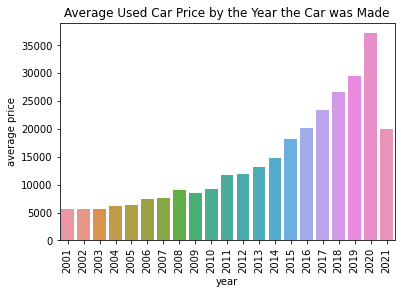

In [ ]:
yearly_price_avg = sns.barplot(data = avg_price_by_year, x= avg_price_by_year['year'], y = avg_price_by_year['average price'])
yearly_price_avg.set_xticklabels(yearly_price_avg.get_xticklabels(), rotation=90)
yearly_price_avg.set_title('Average Used Car Price by the Year the Car was Made')



> Overall, the price of the used cars shows is increasing from a 2001 model to a 2021 model. This makes a lot of sense because the later the car was made, the newer it is, meaning it has also been used for fewer years. As for the 2021 average price being lower than 2020, this is likely due to the small sample size from that year (5) since most manufacturers didn't start selling 2021 models until at like halfway through 2020, and this dataset is for used cars.

---







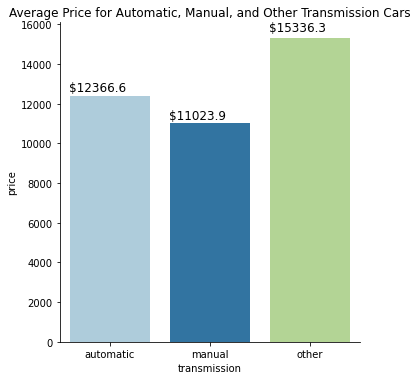

In [ ]:
# average price for different transmission types
g = sns.catplot(x='transmission',y='price',data=car_data,kind='bar',ci=None,palette='Paired')
plt.title('Center Title')
plt.title('Average Price for Automatic, Manual, and Other Transmission Cars')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '${0:.1f}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')




> To sum up, the average price for used automatic cars is the higher 
than the average price for used manual transmission cars (\$12,367 vs. \$11,024). Generally, it seems in the US, more newer cars have automatic transmission, which could be another reason for this price discrepancy. As for 'other' transmission type being the highest, it seems that a different type of transmission such as CVT shouldn't be a huge factor in the price of the car, so it's possible that the cars themselves were just nicer models on average.












In [ ]:
# sub-dataframe with key attributes
# we will use this key_attributes subset for correlation analysis and further regression model building

subset_columns = ['price','year','manufacturer', 'condition','cylinders','fuel', 'odometer', 'title_status','transmission','drive','size','type','paint_color', 'state']   # list of key attributes
car_data_attr = car_data.filter(subset_columns)
car_data_attr.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
4,16995,2007,gmc,3,8,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn
5,13995,2012,ford,3,6,gas,188406.0,clean,automatic,4wd,full-size,truck,grey,mn
6,7995,2010,chevrolet,3,4,gas,108124.0,clean,automatic,4wd,full-size,SUV,grey,mn
7,8995,2011,chevrolet,3,6,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,mn
8,10995,2014,ford,3,6,gas,170259.0,clean,automatic,4wd,full-size,SUV,white,mn


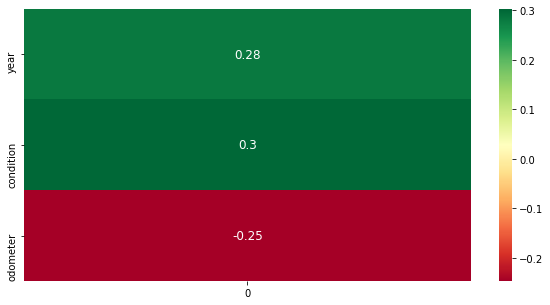

In [ ]:
# checking the correltaion between price and all the other numerical attributes

df_corr_impact_price = car_data_attr_corr.drop('price',axis=1).corrwith(car_data_attr['price'])
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr_impact_price.to_frame(),annot=True, annot_kws={'size':12},cmap="RdYlGn")
plt.show();



> Learning from the correlation table, year and condition are positively affecting the price, while odometer is negatively affecting the price.



After knowing the correlation between price and all the other attributes, we will now look at the relaitonship between price and year, condition and odometer seperately. 

Text(0.5, 1.0, 'price vs. mileage')

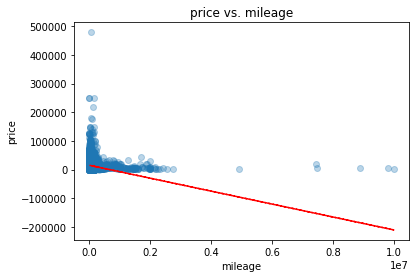

In [ ]:
# How Odometer Affects the Price
x = car_data['odometer']
y = car_data['price']

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x,y, alpha=0.3)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('price vs. mileage')


> Generally, cars with lower mileage sell for higher prices. This is logical because they are also generally newer but more so, they will have less wear and tear on them.



Text(0.5, 1.0, 'price vs. year')

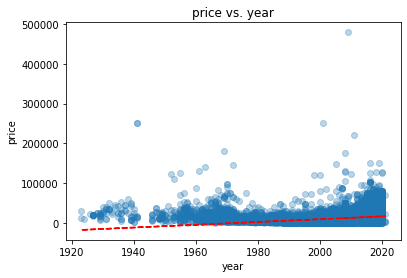

In [ ]:
# How (Model) Year Affects the Price
x = car_data['year']
y = car_data['price']

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x,y, alpha=0.3)
plt.xlabel('year')
plt.ylabel('price')
plt.title('price vs. year')



> Overall, the newer the model of car (year), the higher the price the car will sell for. Again this makes sense because the car is then newer.



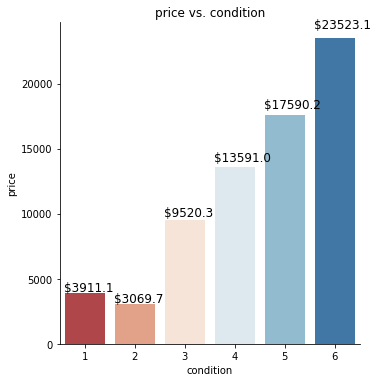

In [ ]:
# How Condition Affects the Year
graph = sns.catplot(data=car_data,x='condition',y='price',palette='RdBu',kind='bar',ci=None)
plt.xlabel('condition')
plt.ylabel('price')
plt.title('price vs. condition')

ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.03, 
           '${0:.1f}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')



> On average, if the condition level is higher, the price of the used car would be higher.



## Machine Learning


1.   Regression Table
2.   Price Predicting Model



In [ ]:
# turn categorical variables into dummy variables for machine learning

car_data_attr_dummy = pd.get_dummies(car_data_attr, drop_first=True)
car_data_attr_dummy.head()

,price,year,condition,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,...,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
4,16995,2007,3,254217.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,13995,2012,3,188406.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7995,2010,3,108124.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8995,2011,3,178054.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10995,2014,3,170259.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# BASIC REGRESSION MODEL (with OLS)

# Regression with year and odometer
X = car_data_attr_dummy[['year', 'odometer']]
y = car_data_attr_dummy[['price']]

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = LinearRegression(fit_intercept=True)
model
model.fit(X, y)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

X = sm.add_constant(X) # adding a constant
 
reg_model = sm.OLS(y, X).fit()
predictions = reg_model.predict(X) 
 
print_model = reg_model.summary()
print(print_model)

Intercept: 
 [-615573.10650101]
Coefficients: 
 [[ 3.13746607e+02 -1.92585155e-02]]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4080.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:15:55   Log-Likelihood:            -6.2265e+05
No. Observations:               58413   AIC:                         1.245e+06
Df Residuals:                   58410   BIC:                         1.245e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Basic Regression Model with regular linear regression

In [ ]:
# feature matrix
X = car_data_attr_dummy[['year', 'odometer']]

# target array
y = car_data_attr_dummy['price']


In [ ]:
# split into test and training data sets

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=700)

In [ ]:
# instantiate the model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# fit the model to the training data 

model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model coefficients:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients:     [ 3.05313974e+02 -2.03407102e-02]
Model intercept: -598551.4029608915


In [ ]:
# predict on new test data

y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='Predicted Price')).head(10)

,index,year,odometer,price,Predicted Price
0,296852,2013,76163.0,9000,14496.417562
1,324919,2015,76000.0,14995,15110.361046
2,418890,2017,39884.0,17499,16455.614084
3,300635,2002,176000.0,3000,9107.208361
4,314098,2007,125860.0,7850,11653.661441
5,330048,2010,94000.0,7000,13217.658391
6,237971,2010,162000.0,15500,11834.490097
7,90684,2006,168000.0,4000,10491.189939
8,362325,2002,118000.0,6000,10286.969553
9,28761,2008,140000.0,4500,11671.357773


In [ ]:
# calculate mean absolute error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

6808.128998268725

In [ ]:
# R^2 value
model.score(X, y)

0.1224083976316872



> This model shows us a very basic regression model only using year and odometer (mileage) to predict price. Obviously, this model is not likely to be as robust as our next model that uses many more input variables.



Creating a linear regression model using all of the variables in the car_data_attr dataframe except for state since it would create too many columns

In [ ]:
# taking state out since it creates too many variables

car_data_attr_2 = car_data_attr.drop(labels= ['state'], axis=1)

In [ ]:
car_data_attr_2_dummy = pd.get_dummies(car_data_attr_2, drop_first=True)

Full Linear Regression Model

In [ ]:
# feature matrix
X = car_data_attr_2_dummy.drop('price', axis=1)

# target array
y = car_data_attr_2_dummy['price']

In [ ]:
# split into test and training data sets

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [ ]:
# instantiate the model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# fit the model to the training data 

model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model coefficients:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients:     [ 3.54592038e+02  3.08915622e+03 -1.72506887e-02  7.67134221e+03
  5.67369829e+03  7.91942133e+02 -1.28086153e+03  3.57480831e+02
  8.96035093e+02 -8.27719269e+02 -2.24704162e+03  1.14360746e+04
 -1.53738415e+03  7.66787772e+04 -3.82211988e+03 -8.71678339e+02
  2.14083289e+02 -3.24705460e+03 -1.02037043e+03 -1.93472433e+03
 -1.18280709e+03 -4.27506531e+03 -4.38882645e+02 -2.14114637e+03
 -1.90654287e+02  8.62356711e+02 -7.41873209e+02 -2.08948630e+03
  3.95737259e+02 -3.71754717e+03 -2.58660886e+03 -3.48546126e+03
 -1.92913177e+03 -3.81512665e+02  1.54873487e-06  6.27812188e+02
  2.23230606e+03 -3.36050958e+03 -2.34413550e+03  2.40267315e+04
  1.33347098e+02 -1.62097227e+03 -2.47321822e+02 -5.67244018e+01
 -1.41666770e+03  8.37702661e+02  3.66911007e+03  4.48458153e+03
  3.46168217e+04  1.68527003e+03 -6.94294757e+03 -6.85016604e+03
 -6.67435351e+03 -8.05990495e+03  3.76923479e+03  1.90800226e+02
 -1.65663816e+03 -9.51191330e+02 -1.43525394e+03  2.17219795e+03
 

In [ ]:
model.coef_.min()

-8059.904954414015

In [ ]:
model.coef_.max()

76678.7771690053

In [ ]:
X.columns

Index(['year', 'condition', 'odometer', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesla',

In [ ]:
# predict on new test data

y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='Predicted Price')).head(10)

,index,year,condition,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,...,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,price,Predicted Price
0,298433,2011,5,200601.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7995,16135.544144
1,377770,2012,3,141910.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7873,6634.790937
2,75612,2010,3,135000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3250,3759.678498
3,239700,2002,4,96223.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5895,12725.738675
4,319947,2009,3,102895.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6495,6999.500582
5,389721,2016,4,36869.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,17995,13966.324809
6,201768,2009,4,118000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7450,6319.284953
7,298670,2017,4,85444.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11995,9588.498546
8,213001,2008,5,187000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8000,18325.137457
9,1900,1998,3,165761.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2000,-1091.107967


In [ ]:
# calculate mean absolute error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

5054.134973050075

On average, this model's predictions are \$5,108 off from the actual price. As compared to our basic model with a mean absolute error of \$6,873, this model has a lower error, showing that it is a better predictor.

In [ ]:
# R^2 value
model.score(X, y)

0.4226110049550682

The R^2 value for this model is much higher than that of the basic model, showing that a higher proportion of the variance in price is explained by the independent variables.